<a href="https://colab.research.google.com/github/pranab-martiniapp/data-science-boot-camp/blob/main/Projects/Project_1/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Transaction Success Prediction

## Problem Definition


This project delves into the analysis of transaction data with the aim of predicting future customer behavior. Specifically, our objective is to forecast whether a customer will engage in a transaction based on their transaction history. The input variables' columns have been anonymized. Therefore, we treat all variables with equal consideration. The data set has a target column, denoted as 'target,' which mean this will be a supervised learning problem. Furthermore it is a binary classification challenge, as transactions are categorized as either successful or unsuccessful.

We will use Naive Bayes classification in predicting transaction outcomes.

## Data Collection/Sources


### Data Overview

This data comes from [Robert Citek](http://ddc-datascience.s3-website-us-west-1.amazonaws.com/Projects/Project.1-Transactions/Data/). It contains data representing transactions in a system. The dataset contains a target column that signifies whether a transaction was successful or not. The goal is to use this data to train a model that can predict whether transactions in the future will be successful or not.



### Imports


In [ ]:
import os
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from statsmodels.graphics.gofplots import qqplot

### File Paths

In [ ]:
base_path = 'http://ddc-datascience.s3-website-us-west-1.amazonaws.com/Projects/Project.1-Transactions/Data/'
train_path = base_path + 'Transaction.train.csv'

### Load Data

Here we will load the data into a DataFrame and just take a look at the first few rows to make sure everything looks good.

In [ ]:
transact_train_orig = pd.read_csv(train_path)
transact_train_orig.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


In [ ]:
transact_train_orig.shape

(180000, 53)

We can see that our data successfully loaded. Now we can go on to the next step.

## Data Cleaning


Lets look at the last few rows to ensure the data looks good.

In [ ]:
transact_train_orig.tail()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
179995,179995,train_179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,179996,train_179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,179997,train_179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,179998,train_179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760
179999,179999,train_179999,0,11.6252,3.3959,11.5558,4.2003,7.4666,13.7381,12.9590,...,5.0415,-2.4210,-3.6829,14.2422,1.0741,26.3943,4.1482,11.9539,2.9846,15.6002


### Drop Data


Let us begin with dropping columns that will not assist in the training of the model.


In [ ]:
transact_train = transact_train_orig.copy()
transact_train.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


The Unnamed: 0 column seems to hold the same information as the named index. This will not be useful towards training the model.

The ID_code column also seems unique for each row and matches the named column. This will not be useful towards training the model.

In [ ]:
transact_train.drop('Unnamed: 0', axis=1, inplace=True)
transact_train.drop('ID_code', axis=1, inplace=True)
transact_train.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


### Check For Null Values

In [ ]:
transact_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   target  180000 non-null  int64  
 1   var_0   180000 non-null  float64
 2   var_1   180000 non-null  float64
 3   var_2   180000 non-null  float64
 4   var_3   180000 non-null  float64
 5   var_4   180000 non-null  float64
 6   var_5   180000 non-null  float64
 7   var_6   180000 non-null  float64
 8   var_7   180000 non-null  float64
 9   var_8   180000 non-null  float64
 10  var_9   180000 non-null  float64
 11  var_10  180000 non-null  float64
 12  var_11  180000 non-null  float64
 13  var_12  180000 non-null  float64
 14  var_13  180000 non-null  float64
 15  var_14  180000 non-null  float64
 16  var_15  180000 non-null  float64
 17  var_16  180000 non-null  float64
 18  var_17  180000 non-null  float64
 19  var_18  180000 non-null  float64
 20  var_19  180000 non-null  float64
 21  var_20  18

In [ ]:
transact_train.isna().sum().sum()

0

All rows have data in all their columns. There are no nulls to handle with this dataset.

### Check Target Values

Since the 'target' column holds our target values, it's a good idea just to check and make sure that all of these values are valid.

In [ ]:
transact_train['target'].value_counts()

0    161960
1     18040
Name: target, dtype: int64

We can see that everything is a '0' or a '1' which is good. We do notice from this that our data is not balanced. 161960 unsuccessful transaction versus 18040 successful. This means our dataset is unbalanced.

## Exploratory Data Analysis


### Check Data Distribution

Let us spend some time understanding the contents of the training dataframe.

In [ ]:
df_describe_stats = transact_train.describe().transpose()
df_describe_stats

,count,mean,std,min,25%,50%,75%,max
target,180000.0,0.100222,0.300297,0.0000,0.000000,0.00000,0.000000,1.0000
var_0,180000.0,10.678650,3.041036,0.4084,8.451675,10.52675,12.756200,20.3150
var_1,180000.0,-1.630045,4.050519,-15.0434,-4.745600,-1.61125,1.360225,10.3768
var_2,180000.0,10.712922,2.639146,2.1171,8.720000,10.57960,12.514100,19.3530
var_3,180000.0,5.408688,0.866265,2.3473,4.768500,5.38560,6.003200,8.4477
var_4,180000.0,7.566953,1.235043,3.9705,6.618800,7.62850,8.583800,11.1506
var_5,180000.0,14.024017,0.190038,13.4346,13.893900,14.02550,14.164400,14.6545
var_6,180000.0,8.528080,4.641700,-6.0111,5.065750,8.59920,12.273300,22.3315
var_7,180000.0,15.243424,7.851050,-10.6642,9.170200,15.19890,21.010500,41.7480
var_8,180000.0,17.264876,8.203204,-10.0890,11.552000,17.24685,23.100050,49.0443


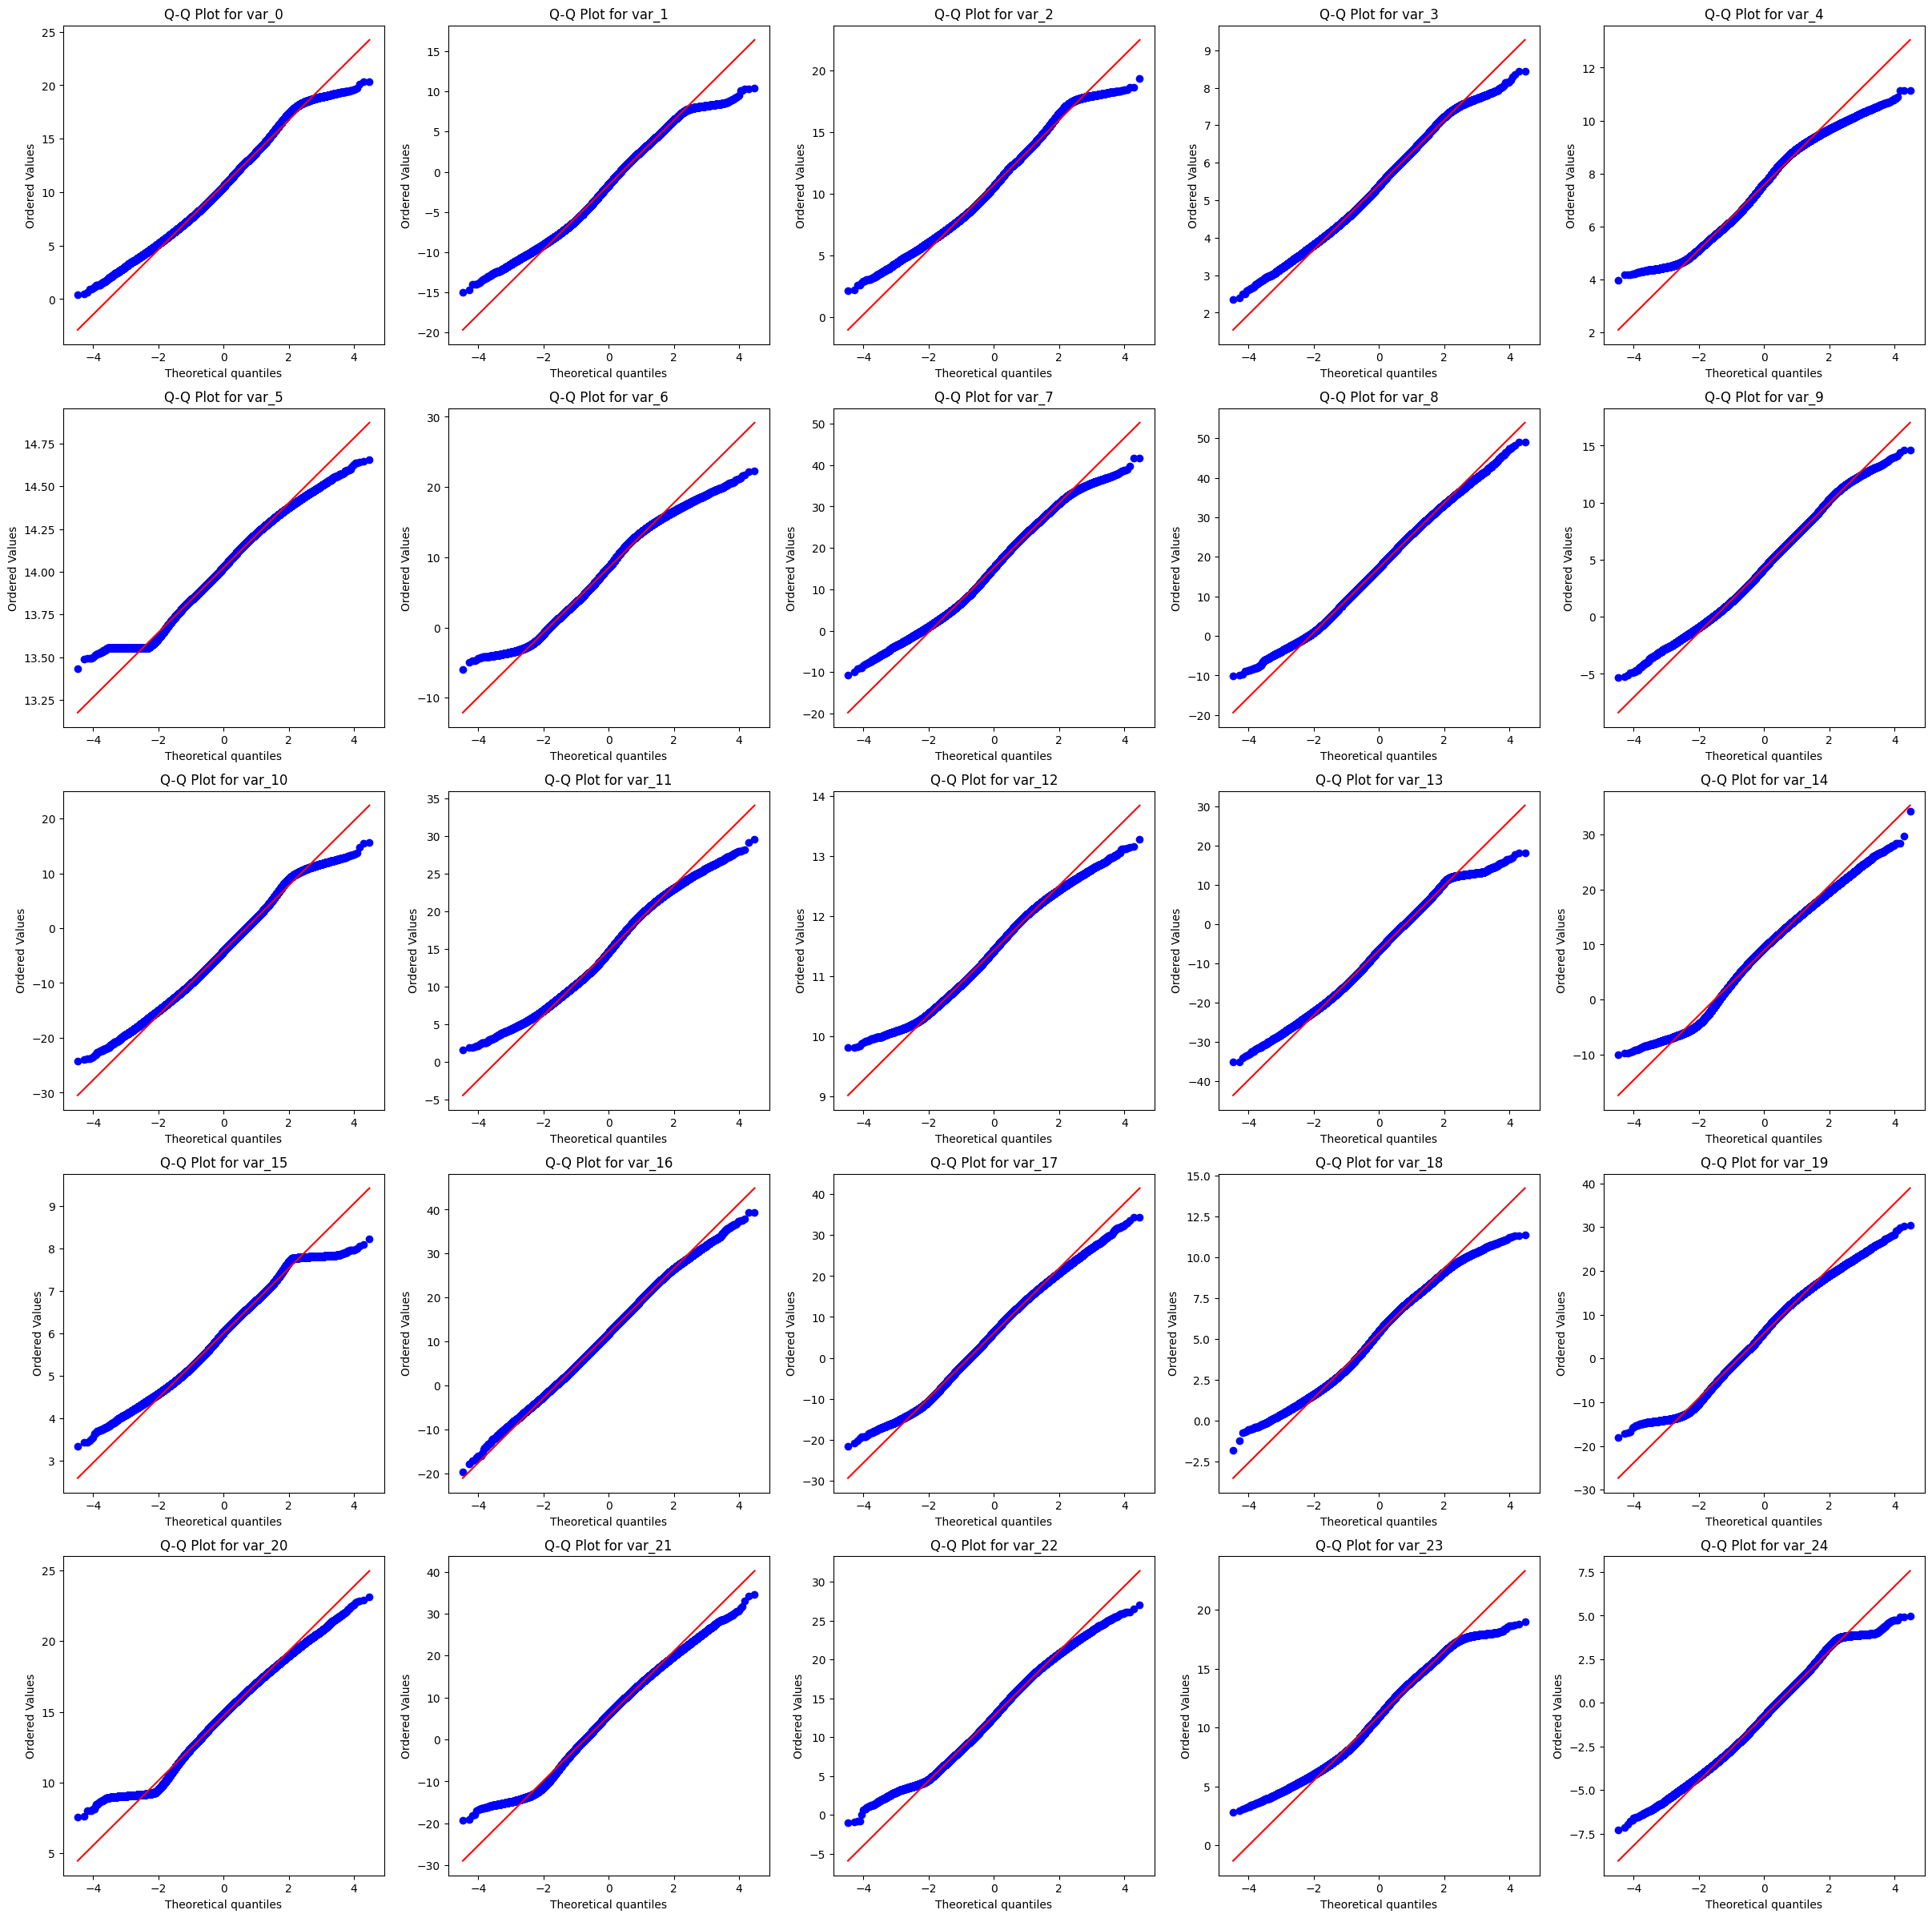

In [ ]:
# Let's plot the first 25 predictors
fig, subplots = plt.subplots(5,5, figsize = (30,30))
column_names = transact_train.columns[1:26]

subplots = subplots.flatten()[:len(column_names)]  # flatten and slice subplots so that we only plot uptill the features exist
for n, subplot in enumerate(subplots):             # Loop through subplots
  stats.probplot(transact_train[column_names[n]], dist="norm", plot=subplot)
  subplot.set_title(f'Q-Q Plot for {column_names[n]}')
  subplot.get_lines()[1].set_color('red')  # Highlight the diagonal line

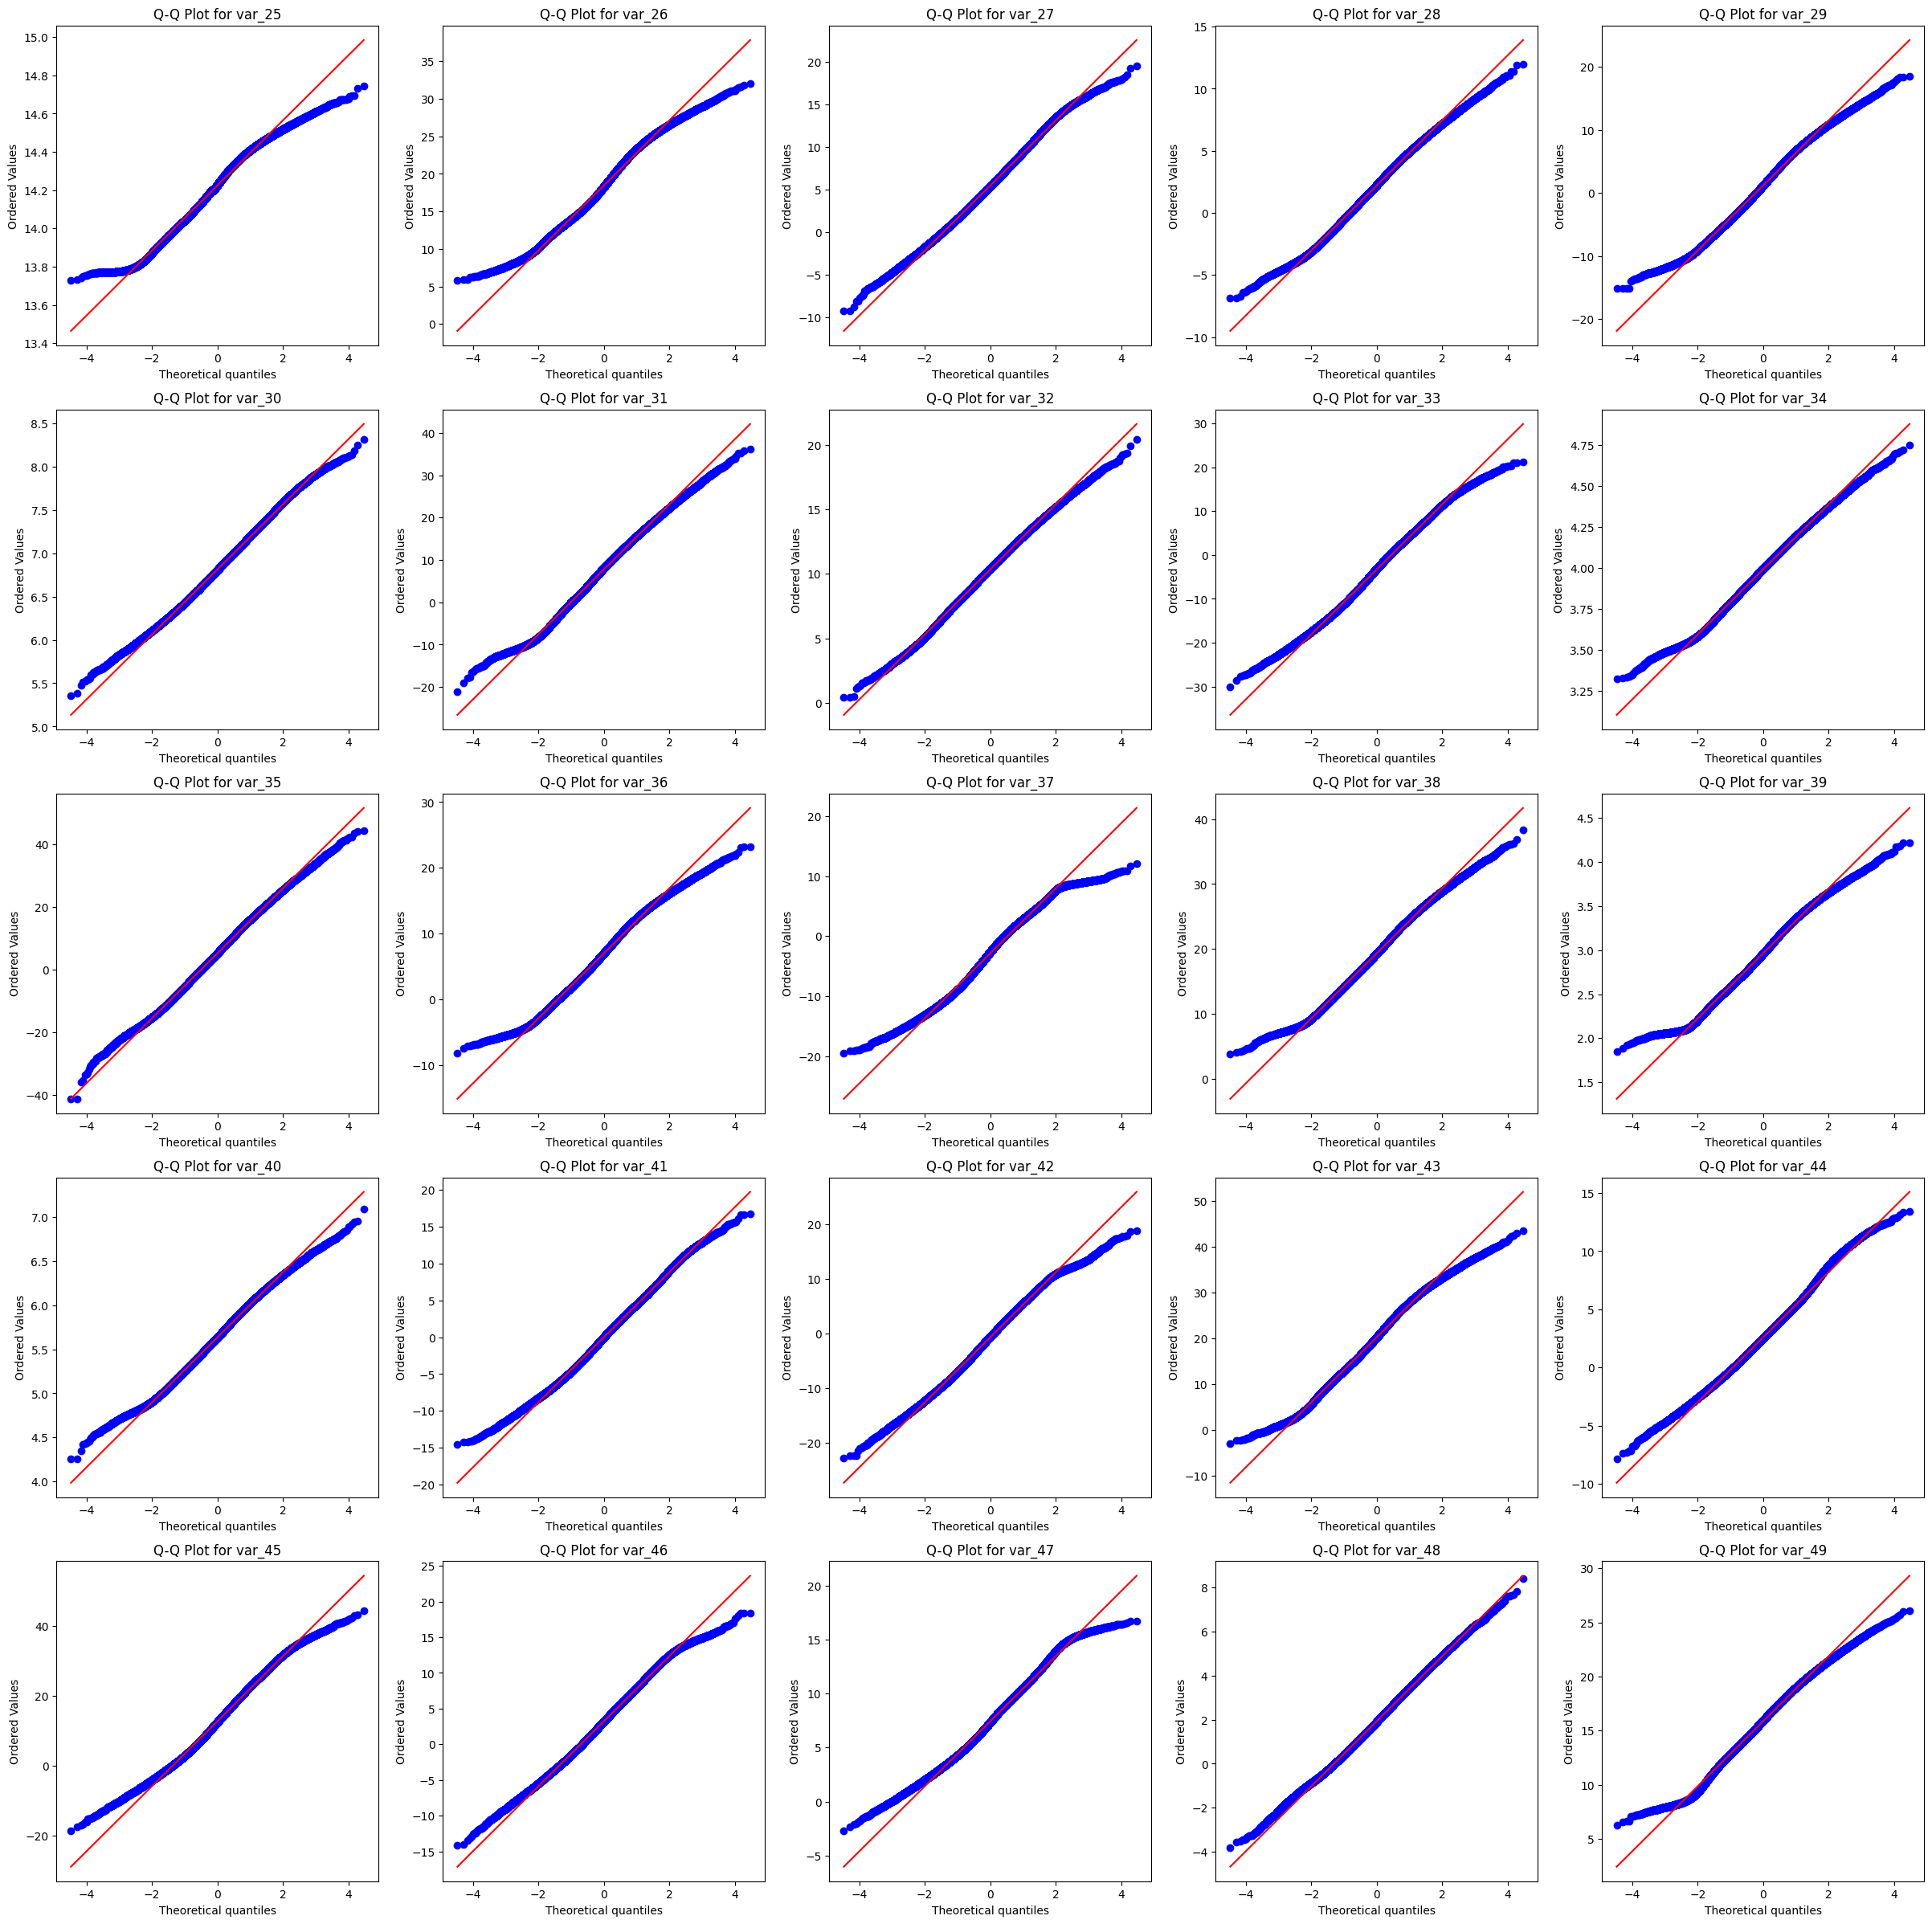

In [ ]:
# Let's plot the last 25 predictors
fig, subplots = plt.subplots(5,5, figsize = (30,30))
column_names = transact_train.columns[26:52]

subplots = subplots.flatten()[:len(column_names)]  # flatten and slice subplots so that we only plot uptill the features exist
for n, subplot in enumerate(subplots):             # Loop through subplots
  stats.probplot(transact_train[column_names[n]], dist="norm", plot=subplot)
  subplot.set_title(f'Q-Q Plot for {column_names[n]}')
  subplot.get_lines()[1].set_color('red')  # Highlight the diagonal line

The above plots show that most of the predictors are normally distributed.


### Check Feature Correlation

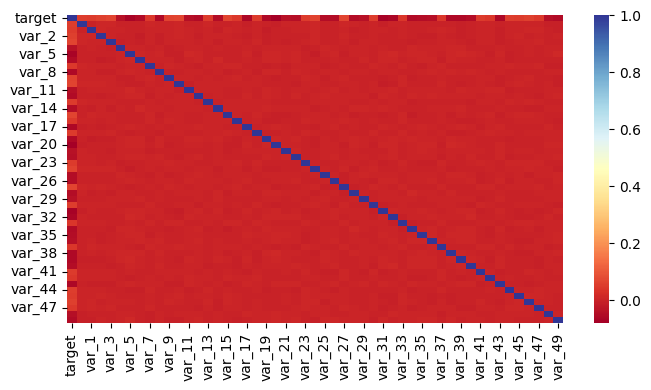

In [ ]:
feature_corr = transact_train.corr()
plt.figure(figsize=(8,4))
sns.heatmap(feature_corr, cmap='RdYlBu',annot = False );

The heatmap plot isn't too helpful as there is too much data to visually make sense of.

In [ ]:
feature_corr_unstacked = feature_corr.unstack()
feature_corr_unstacked_not_self = feature_corr_unstacked[ feature_corr_unstacked !=1 ]
feature_corr_unstacked_not_self

target  var_0     0.052904
        var_1     0.049916
        var_2     0.055450
        var_3     0.066924
        var_4    -0.042073
                    ...   
var_49  var_44    0.000081
        var_45   -0.003859
        var_46   -0.001607
        var_47   -0.000892
        var_48    0.003141
Length: 2550, dtype: float64

In [ ]:
# Because negative correlation could also be of interest, we will take the absolute value, `abs()`.
feature_corr_unstacked_not_self['target'].abs().sort_values(ascending = False)

var_20    0.080689
var_31    0.073296
var_5     0.070015
var_3     0.066924
var_27    0.064868
var_32    0.063871
var_10    0.063565
var_15    0.062887
var_43    0.061291
var_17    0.059906
var_24    0.059306
var_9     0.059227
var_8     0.057378
var_39    0.057373
var_19    0.057320
var_46    0.056902
var_38    0.055704
var_2     0.055450
var_6     0.054375
var_34    0.053733
var_0     0.052904
var_30    0.052457
var_12    0.052324
var_49    0.051718
var_44    0.051110
var_26    0.050278
var_40    0.050049
var_1     0.049916
var_28    0.049551
var_13    0.049072
var_14    0.048623
var_18    0.048392
var_35    0.048198
var_41    0.047948
var_23    0.047569
var_45    0.047543
var_25    0.047005
var_22    0.046433
var_11    0.045516
var_36    0.045513
var_47    0.045506
var_16    0.045281
var_7     0.044769
var_48    0.042765
var_4     0.042073
var_29    0.041987
var_42    0.041593
var_33    0.040520
var_21    0.040311
var_37    0.040147
dtype: float64

We see that none of the predictors are correlated with the target.

In [ ]:
feature_corr_pair = feature_corr_unstacked_not_self.abs().sort_values(kind='quicksort', ascending = False)
feature_corr_pair[::2].head(20)

target  var_20    0.080689
var_31  target    0.073296
target  var_5     0.070015
var_3   target    0.066924
var_27  target    0.064868
var_32  target    0.063871
target  var_10    0.063565
var_15  target    0.062887
target  var_43    0.061291
        var_17    0.059906
var_24  target    0.059306
target  var_9     0.059227
        var_8     0.057378
var_39  target    0.057373
var_19  target    0.057320
target  var_46    0.056902
var_38  target    0.055704
var_2   target    0.055450
target  var_6     0.054375
var_34  target    0.053733
dtype: float64

We see that none of the predictors are correlated to each other.

Given that the predictors are normally distributed and that they are not correlated to each other we shall use Navie Bayes for our model.

## Processing


### CV Calculator Function

In [ ]:
def cross_validate(X, y, num_loops, score_type='accuracy'):
  """Randomly splits X and y values into train/test groups (test size = 20%).
  Creates a GaussianNB model.
  Returns a numpy array of scores for the tests based on type.
  By default type of scores is accuracy.
  """

  scores = np.zeros(num_loops)

  for i in range(num_loops):
    model_split_cv = GaussianNB()
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)
    model_split_cv.fit(X_train, y_train)
    y_split_pred = model_split_cv.predict(X_test)
    if (score_type == 'accuracy'):
      scores[i] = metrics.accuracy_score(y_test, y_split_pred)
    elif (score_type == 'precision'):
      scores[i] = metrics.precision_score(y_test, y_split_pred)
    elif (score_type == 'recall'):
      scores[i] = metrics.recall_score(y_test, y_split_pred)
    elif (score_type == 'f1'):
      scores[i] = metrics.f1_score(y_test, y_split_pred)

  return scores

### Split Data

Split the dataframe to two dataframes. One dataframe where all targets are 0 and the other where its 1.

In [ ]:
transact_train_target_0 = transact_train[transact_train['target'] == 0].copy()
transact_train_target_0.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


In [ ]:
transact_train_target_0.shape

(161960, 51)

In [ ]:
transact_train_target_1 = transact_train[transact_train['target'] == 1].copy()
transact_train_target_1.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
13,1,16.3699,1.5934,16.7395,4.8222,8.6978,13.7999,2.7925,14.3984,19.4258,...,5.6656,3.5750,-2.2723,15.7383,8.5618,11.8982,7.4002,7.4031,4.3989,15.6064
29,1,5.3301,-2.6064,13.1913,5.9064,9.1168,14.0957,12.3335,1.6610,13.0446,...,5.4183,8.6643,4.1428,4.7056,4.3694,16.4554,5.9215,7.9676,2.3405,17.4105
63,1,7.7072,0.0183,9.9974,6.0425,6.6710,14.0503,9.0144,-2.3445,23.5101,...,6.0669,2.5841,2.2445,23.1283,2.9384,27.6213,1.5832,5.0039,3.8814,15.7685
65,1,10.5358,-2.5439,8.7394,5.1584,9.0358,13.6021,4.2864,13.8723,2.2106,...,6.1149,2.2550,-7.2104,19.7545,6.3190,11.9410,4.6648,6.4227,3.4025,15.1340
71,1,6.7547,2.5973,14.2141,4.2336,9.1282,13.9394,3.6480,24.2658,33.3687,...,5.0565,11.9429,0.3140,20.4828,7.9488,11.2587,1.4677,3.5935,2.0013,18.9013


In [ ]:
transact_train_target_1.shape

(18040, 51)

Separate our predictors and target.

In [ ]:
y = transact_train['target'].copy()
X = transact_train.drop('target', axis=1, inplace=False)

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [ ]:
y.shape

(180000,)

In [ ]:
X.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,2.5791,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,8.5524,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,1.2145,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,6.8202,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,10.1102,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


In [ ]:
X.shape

(180000, 50)

### Train Model \#1 (Unbalanced Data)

Create the GNB model \#1.

In [ ]:
gnb_1 = GaussianNB()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
gnb_1.fit(X_train, y_train)
y_pred = gnb_1.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 36000 points : 3281


Lets take a closer look at the details.

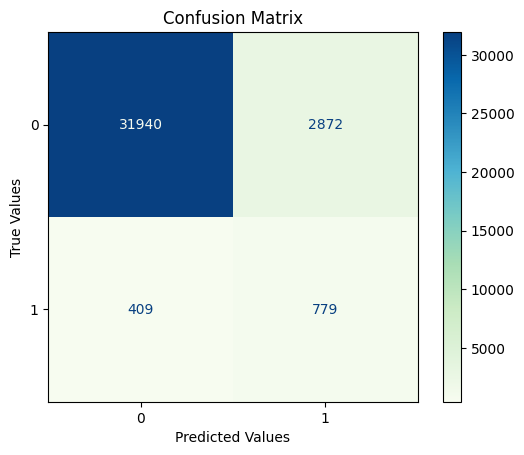

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(
    y_pred,
    y_test,
    cmap='GnBu',
)
plt.grid(False)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title('Confusion Matrix') ;

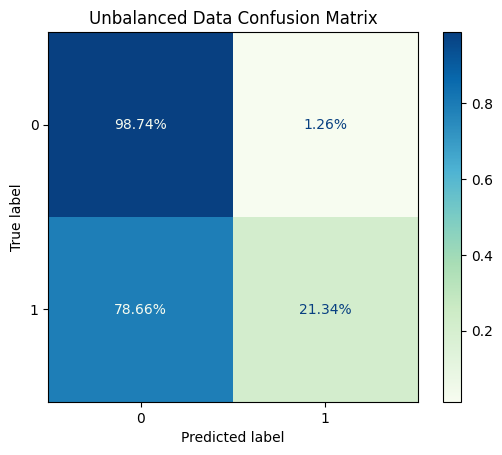

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(
  gnb_1,
  X_test,
  y_test,
  normalize = 'true',
  values_format = '.2%',
  cmap = 'GnBu',
)
plt.grid(False)
plt.title('Unbalanced Data Confusion Matrix') ;
plt.savefig('unbalanced_confusion_matrix.png')

We can see that our model performs better predicting if the transaction was not successul than if it was. This is because our input data is biased with more transactions not being successful.

### CV Model \#1 (Unbalanced Data)

#### Test For Accuracy

Run CV a 100 times to compute accuracy scores.

In [ ]:
unbalanced_data_accuracy_scores = cross_validate(X, y, 100)
print(round(unbalanced_data_accuracy_scores.mean(), 5))

0.9111


Accuracy is a good choice when classes are balanced and not skewed. A 91% accuracy is misleading when we know from our confusion matrix there was lot of false-negatives.

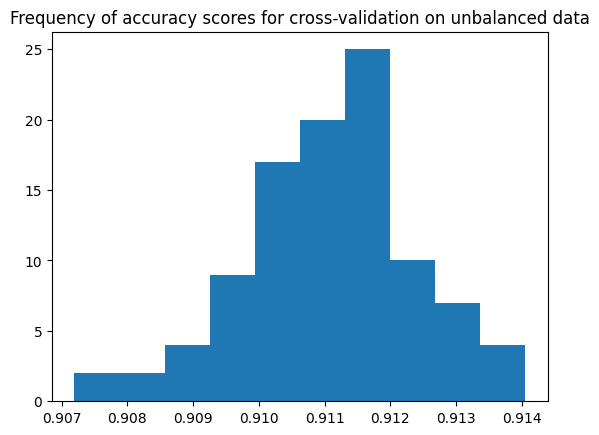

In [ ]:
plt.hist(unbalanced_data_accuracy_scores, bins=10)
plt.title('Frequency of accuracy scores for cross-validation on unbalanced data')
plt.savefig('unbalanced_data_accuracy_scores.png');

The plot shows that the spread of cross-validation scrores is not high.

#### Test For Precision


Precision is good when we want to be very sure in our positive predictions.

Let us see how our model performs when precision is the criterion during cross-validation.

Run CV a 100 times to compute precision scores.

In [ ]:
unbalanced_data_precision_scores = cross_validate(X, y, 100, "precision")
print(round(unbalanced_data_precision_scores.mean(), 5))

0.66571


As expected Precision scores dropped to 66%. This further proves that accuracy is not a good measure given the data is skwed heavily.

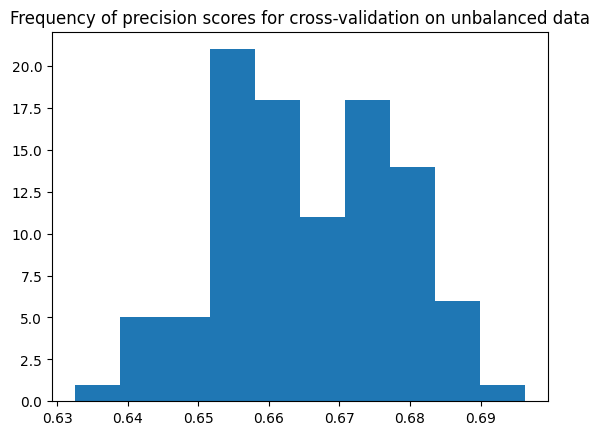

In [ ]:
plt.hist(unbalanced_data_precision_scores, bins=10)
plt.title('Frequency of precision scores for cross-validation on unbalanced data')
plt.savefig('unbalanced_data_precision_scores.png')

There is some spread in precision scores during cross-validation.

#### Test For F1

Let us see what happens when we use F1 as our criterios during cross-validation. We use F1 when we want high precision and recall (we want to classify as many positives as possible).

In otherwords we want to classify as many positives as possible and we want to be very sure in our positive predictions.

Run CV a 100 times to compute F1 scores.

In [ ]:
unbalanced_data_f1_scores = cross_validate(X, y, 100, "f1")
print(round(unbalanced_data_f1_scores.mean(), 5))

0.33986


Bam! F1 scores are 33%. Which means with the given data-set our model is not great at predicting if a transaction will occur or not.

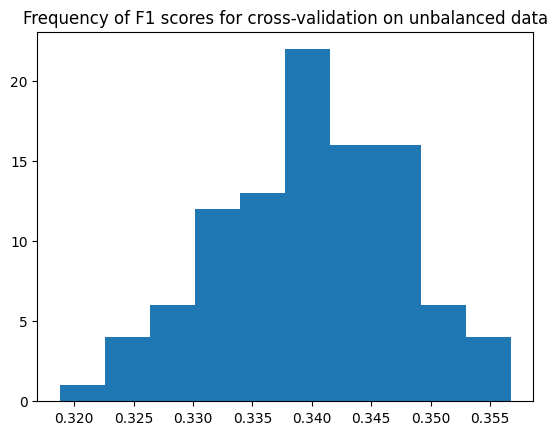

In [ ]:
plt.hist(unbalanced_data_f1_scores, bins=10)
plt.title('Frequency of F1 scores for cross-validation on unbalanced data')
plt.savefig('unbalanced_data_f1_scores.png')

There is some spread in precision scores during cross-validation.

### Create Balanced Data

Let us create a balanced data set. We shall take all successful transaction (target = 1) from the original dataset, and then randomly take equal number of non-successful transactions (target = 0) from the original dataset to a create a new traing dataset.

In [ ]:
sample_count = transact_train_target_1.shape[0]
sample_count

18040

In [ ]:
transact_train_balanced = pd.concat([transact_train_target_0.sample(n=sample_count, random_state=42), transact_train_target_1])
transact_train_balanced.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
80859,0,12.1309,3.7023,10.6870,4.8607,8.3384,14.0598,10.4503,20.2311,14.3418,...,5.1105,7.3679,1.6603,14.3169,2.4792,12.6246,8.0895,9.0333,-0.8285,16.2125
109717,0,12.7841,1.6487,13.6093,5.4508,6.9768,14.0315,7.7062,15.2112,14.8516,...,6.1045,-3.8136,6.0848,17.3155,5.6732,9.5605,-1.9631,10.6872,3.3487,10.8504
101363,0,14.1356,-1.5536,8.8026,4.2596,6.0682,14.3595,6.4783,21.7879,11.2882,...,5.7449,1.3742,7.1982,22.9952,1.3705,-2.2522,9.1098,11.7496,0.9344,18.2137
31967,0,9.1378,4.3576,11.1524,5.6191,9.0943,14.1932,9.3744,20.7422,14.9814,...,6.0328,0.3656,0.3035,21.0027,0.2591,17.2723,-0.4296,3.1559,2.0230,19.8078
166320,0,8.6641,1.3106,8.7793,5.9572,8.8266,13.8616,7.9522,16.0807,32.0387,...,6.0227,-5.1135,-0.8195,18.0469,0.0150,31.3485,2.0435,5.2614,4.0196,18.4218


In [ ]:
transact_train_balanced.shape

(36080, 51)

### Train Model \#2 (Balanced Data)

In [ ]:
gnb_2 = GaussianNB()

Let split the target from the predictors on the balanced dataset.

In [ ]:
y_balanced = transact_train_balanced['target'].copy()
X_balanced = transact_train_balanced.drop('target', axis=1, inplace=False)

In [ ]:
X_balanced_train, X_balanced_test, y_balanced_train, y_balanced_test = train_test_split(X_balanced, y_balanced, test_size=0.20, random_state=42)
gnb_2.fit(X_balanced_train, y_balanced_train)
y_balanced_pred = gnb_2.predict(X_balanced_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_balanced_test.shape[0], (y_balanced_test != y_balanced_pred).sum()))

Number of mislabeled points out of a total 7216 points : 1725


Lets take a closer look at the details.

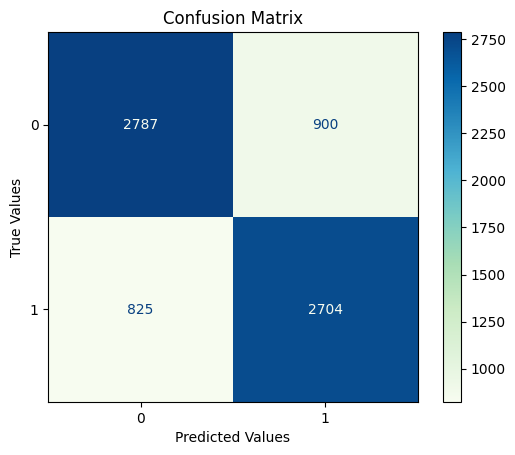

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(
    y_balanced_pred,
    y_balanced_test,
    cmap='GnBu',
)
plt.grid(False)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title('Confusion Matrix') ;

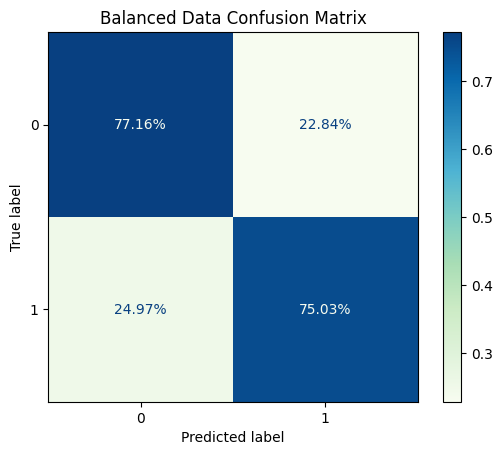

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(
  gnb_2,
  X_balanced_test,
  y_balanced_test,
  normalize = 'true',
  values_format = '.2%',
  cmap = 'GnBu',
)
plt.grid(False)
plt.title('Balanced Data Confusion Matrix') ;
plt.savefig('balanced_data_confusion_matrix.png')

We can see that our model is performing better at predicting when the data is balanced vs not.

### CV Model \#2 (Balanced Data)

#### Test For Accuracy

Run CV a 100 times to compute accuracy scores.



In [ ]:
balanced_data_accuracy_scores = cross_validate(X_balanced, y_balanced, 100)
print(round(balanced_data_accuracy_scores.mean(), 5))

0.75809


The accuracy scores for the balanced data set dropped to to 75% from 91%. However, looking at the confusion matrix above we know that the 75% accuracy is score is more accurate than the 91% in the unbalanced set.

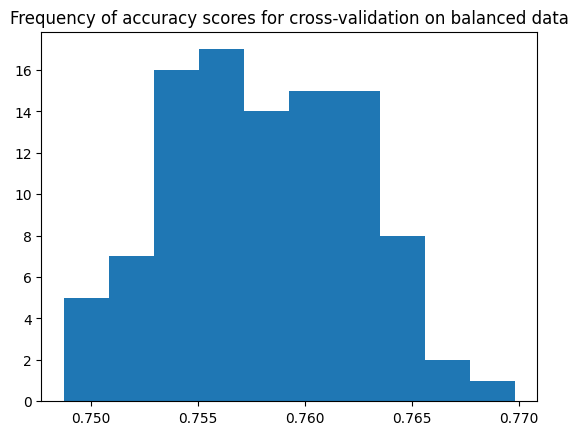

In [ ]:
plt.hist(balanced_data_accuracy_scores, bins=10)
plt.title('Frequency of accuracy scores for cross-validation on balanced data')
plt.savefig('balanced_data_accuracy_scores.png')

The plot shows there is little spread in the cross-validation scrores.

#### Test For Precision

Run CV a 100 times to compute precision scores.

In [ ]:
balanced_data_precision_scores = cross_validate(X_balanced, y_balanced, 100, "precision")
print(round(balanced_data_precision_scores.mean(), 5))

0.76453


Precision score of 76% is higher than the 66% with the unbalanced model.

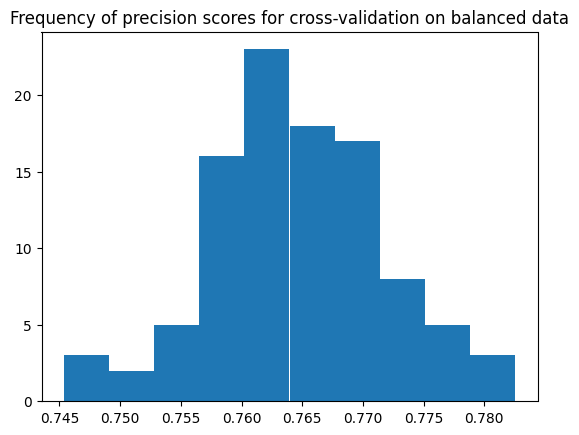

In [ ]:
plt.hist(balanced_data_precision_scores, bins=10)
plt.title('Frequency of precision scores for cross-validation on balanced data')
plt.savefig('balanced_data_precision_scores.png')

The plot shows there is little spread in the cross-validation scrores.

#### Test For F1

Run CV a 100 times to compute F1 scores.

In [ ]:
balanced_data_f1_scores = cross_validate(X_balanced, y_balanced, 100, "f1")
print(round(balanced_data_f1_scores.mean(), 5))

0.7552


Wowza! F1 score of 75% for the model trained with balanced dataset. For reference the F1 score was 34% when the model was trained with unbalanced data.

This means the balanced dataset model can predit more positives and predict them with better fidelity.

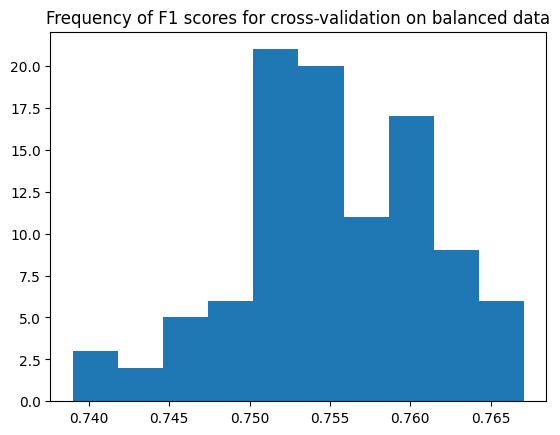

In [ ]:
plt.hist(balanced_data_f1_scores, bins=10)
plt.title('Frequency of F1 scores for cross-validation on balanced data')
plt.savefig('balanced_data_f1_scores.png')

The plot shows there is little spread in the cross-validation scrores.

## Data Visualization/Communication of Results


We created two models. One was trained with un-balanced data and the other with balanced data. The following visualizations will compare and contrast the performance of the two models.

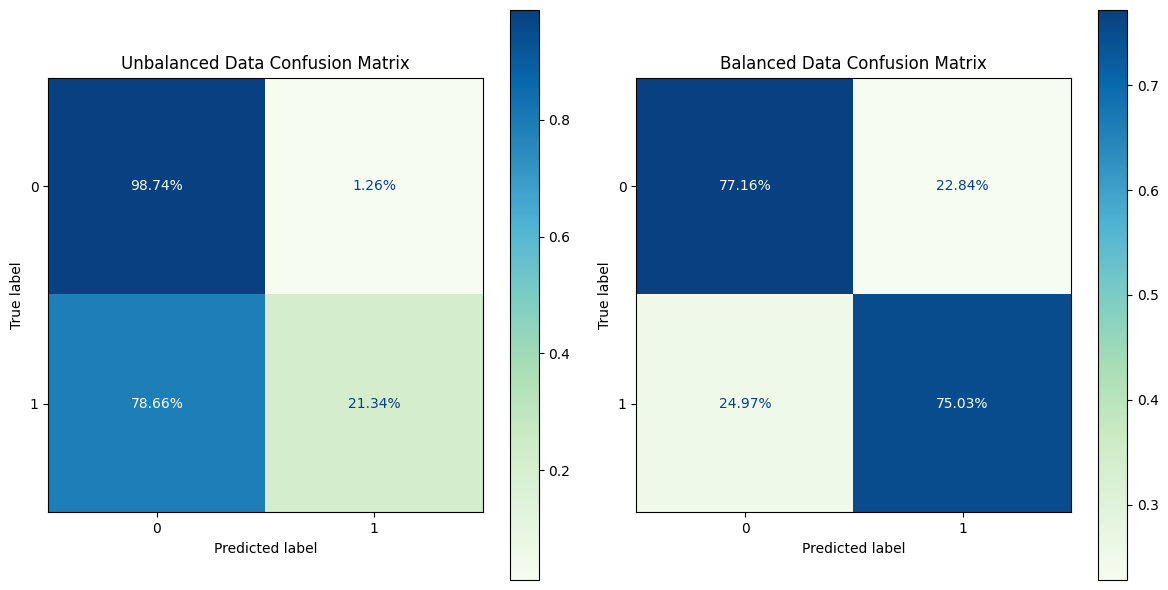

In [ ]:
# Create subplots with 1 row and 2 columns
fig, subplot = plt.subplots(1, 2, figsize=(12, 6))
subplots = subplots.flatten()

metrics.ConfusionMatrixDisplay.from_estimator(
  gnb_1,
  X_test,
  y_test,
  normalize = 'true',
  values_format = '.2%',
  cmap = 'GnBu',
  ax=subplot[0],
)
subplot[0].grid(False)
subplot[0].set_title('Unbalanced Data Confusion Matrix') ;

metrics.ConfusionMatrixDisplay.from_estimator(
  gnb_2,
  X_balanced_test,
  y_balanced_test,
  normalize = 'true',
  values_format = '.2%',
  cmap = 'GnBu',
  ax=subplot[1],
)
subplot[1].grid(False)
subplot[1].set_title('Balanced Data Confusion Matrix') ;

plt.tight_layout()
plt.savefig('confusion_matrix_comparison.png')

The above confusion matrix shows that with balanced data the model is better at predicting successful transactions.

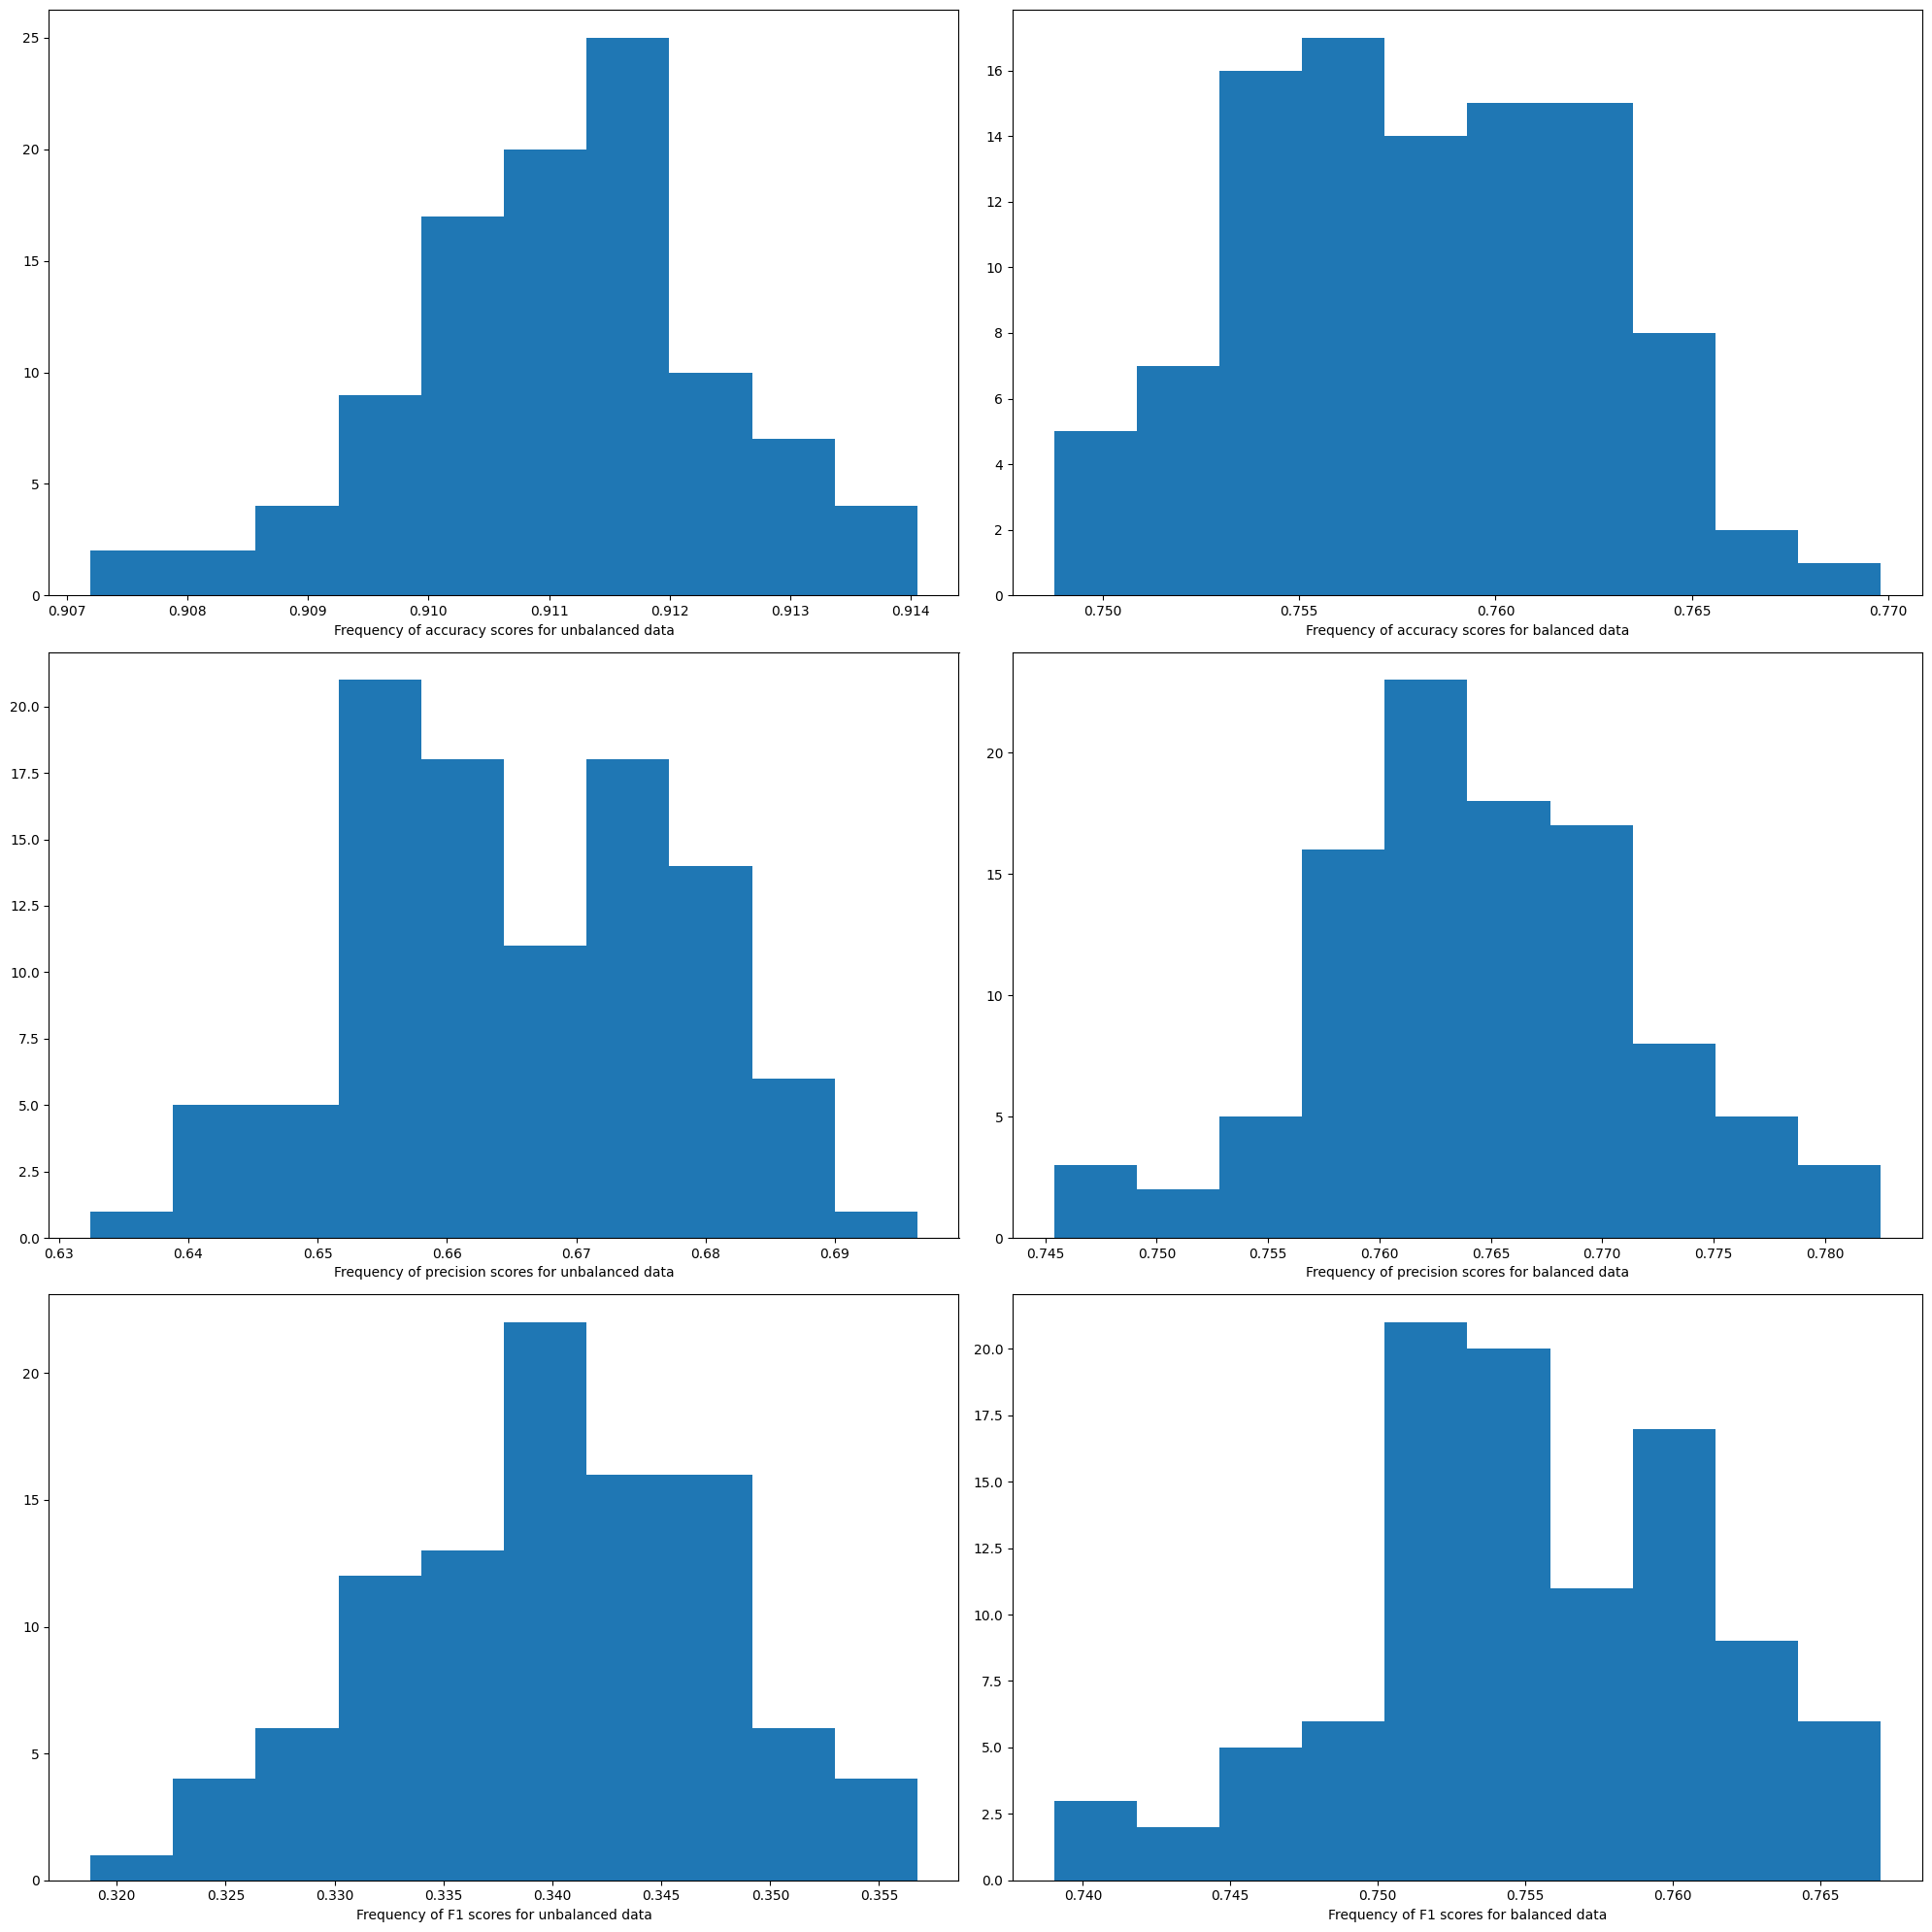

In [ ]:
# Let's plot accuracy, precision and F1 for the balanced and un-balanced dataset
fig, subplots = plt.subplots(3,2, figsize = (20,20))
plot_data = [
  unbalanced_data_accuracy_scores,
  balanced_data_accuracy_scores,
  unbalanced_data_precision_scores,
  balanced_data_precision_scores,
  unbalanced_data_f1_scores,
  balanced_data_f1_scores
]
plot_titles = [
  "Frequency of accuracy scores for unbalanced data",
  "Frequency of accuracy scores for balanced data",
  "Frequency of precision scores for unbalanced data",
  "Frequency of precision scores for balanced data",
  "Frequency of F1 scores for unbalanced data",
  "Frequency of F1 scores for balanced data",
]

subplots = subplots.flatten()[:len(plot_data)]
for n, subplot in enumerate(subplots):
  subplot.hist(plot_data[n], bins=10)
  subplot.set_xlabel(plot_titles[n])

plt.tight_layout()
plt.savefig('cross_validation_comparison.png')

The above cross-validation output shows that the balanced data-set can help train a model that predict a high number of successful transaction correctly.

In [ ]:
def classfication_report_to_image(report, report_name):
  """This function will take a classification report and
     generate an image containing the report.

  Parameters
  ----------
  report: this is the classification report object.
  report_name: this is the name of the image file
  """

  # Save the classification report to a text file
  with open(f"{report_name}.txt", 'w') as f_io:
    f_io.write(report)

  # Open the text file and convert it to an image
  with open(f"{report_name}.txt", 'r') as f_io:
    lines = f_io.readlines()

  # Plot the classification report as text
  plt.figure(figsize=(10, 3))
  plt.text(0.1, 0.9, '\n'.join(lines), fontsize=10, ha='left', va='top', family='monospace')
  plt.axis('off')

  # Save the plot as an image
  plt.savefig(f"{report_name}.png", bbox_inches='tight', pad_inches=0.1, dpi=300)
  plt.close()

  if os.path.exists(f"{report_name}.txt"):
    # Delete the file
    os.remove(f"{report_name}.txt")

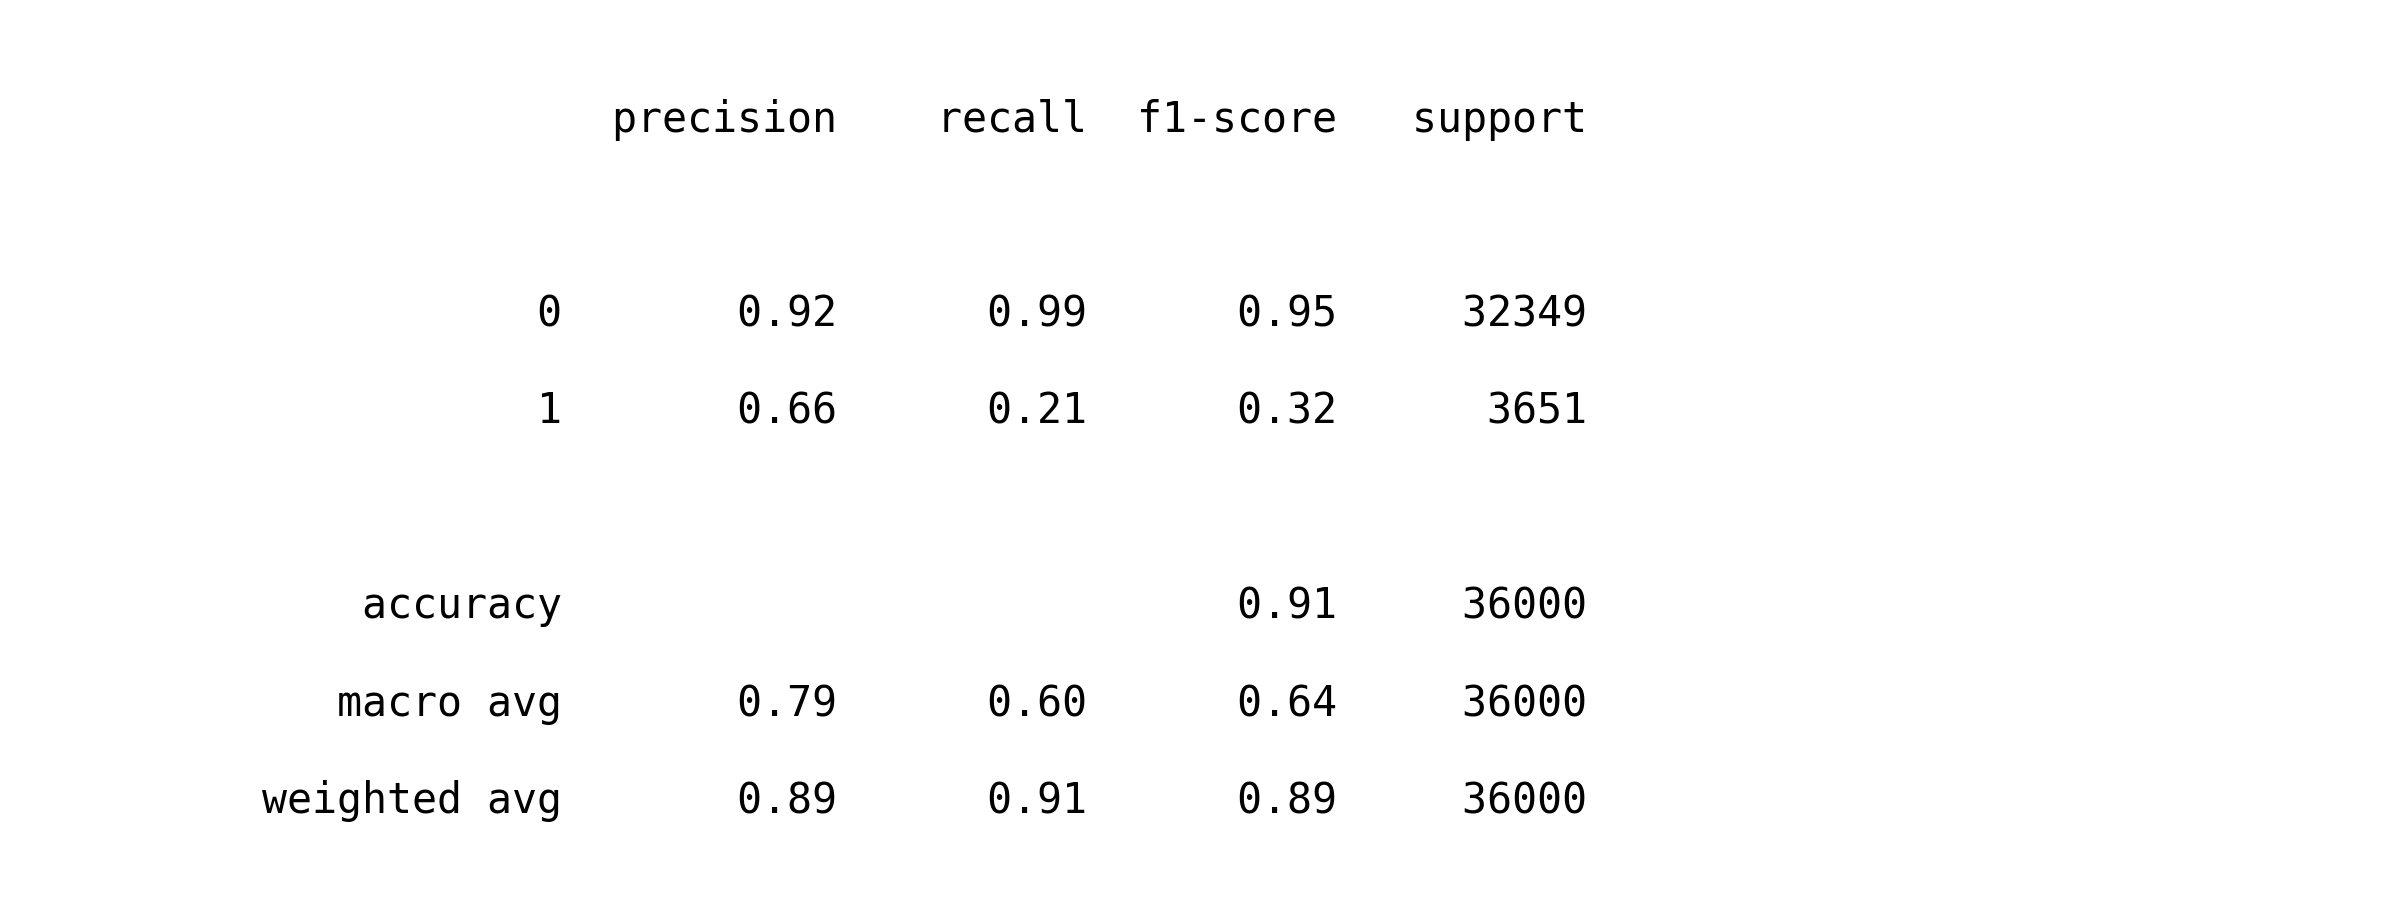

In [ ]:
unbalanced_data_report = classification_report(y_test, y_pred)
classfication_report_to_image(unbalanced_data_report, "unbalanced_data_classification_report")
# Open and display the image
Image("unbalanced_data_classification_report.png")

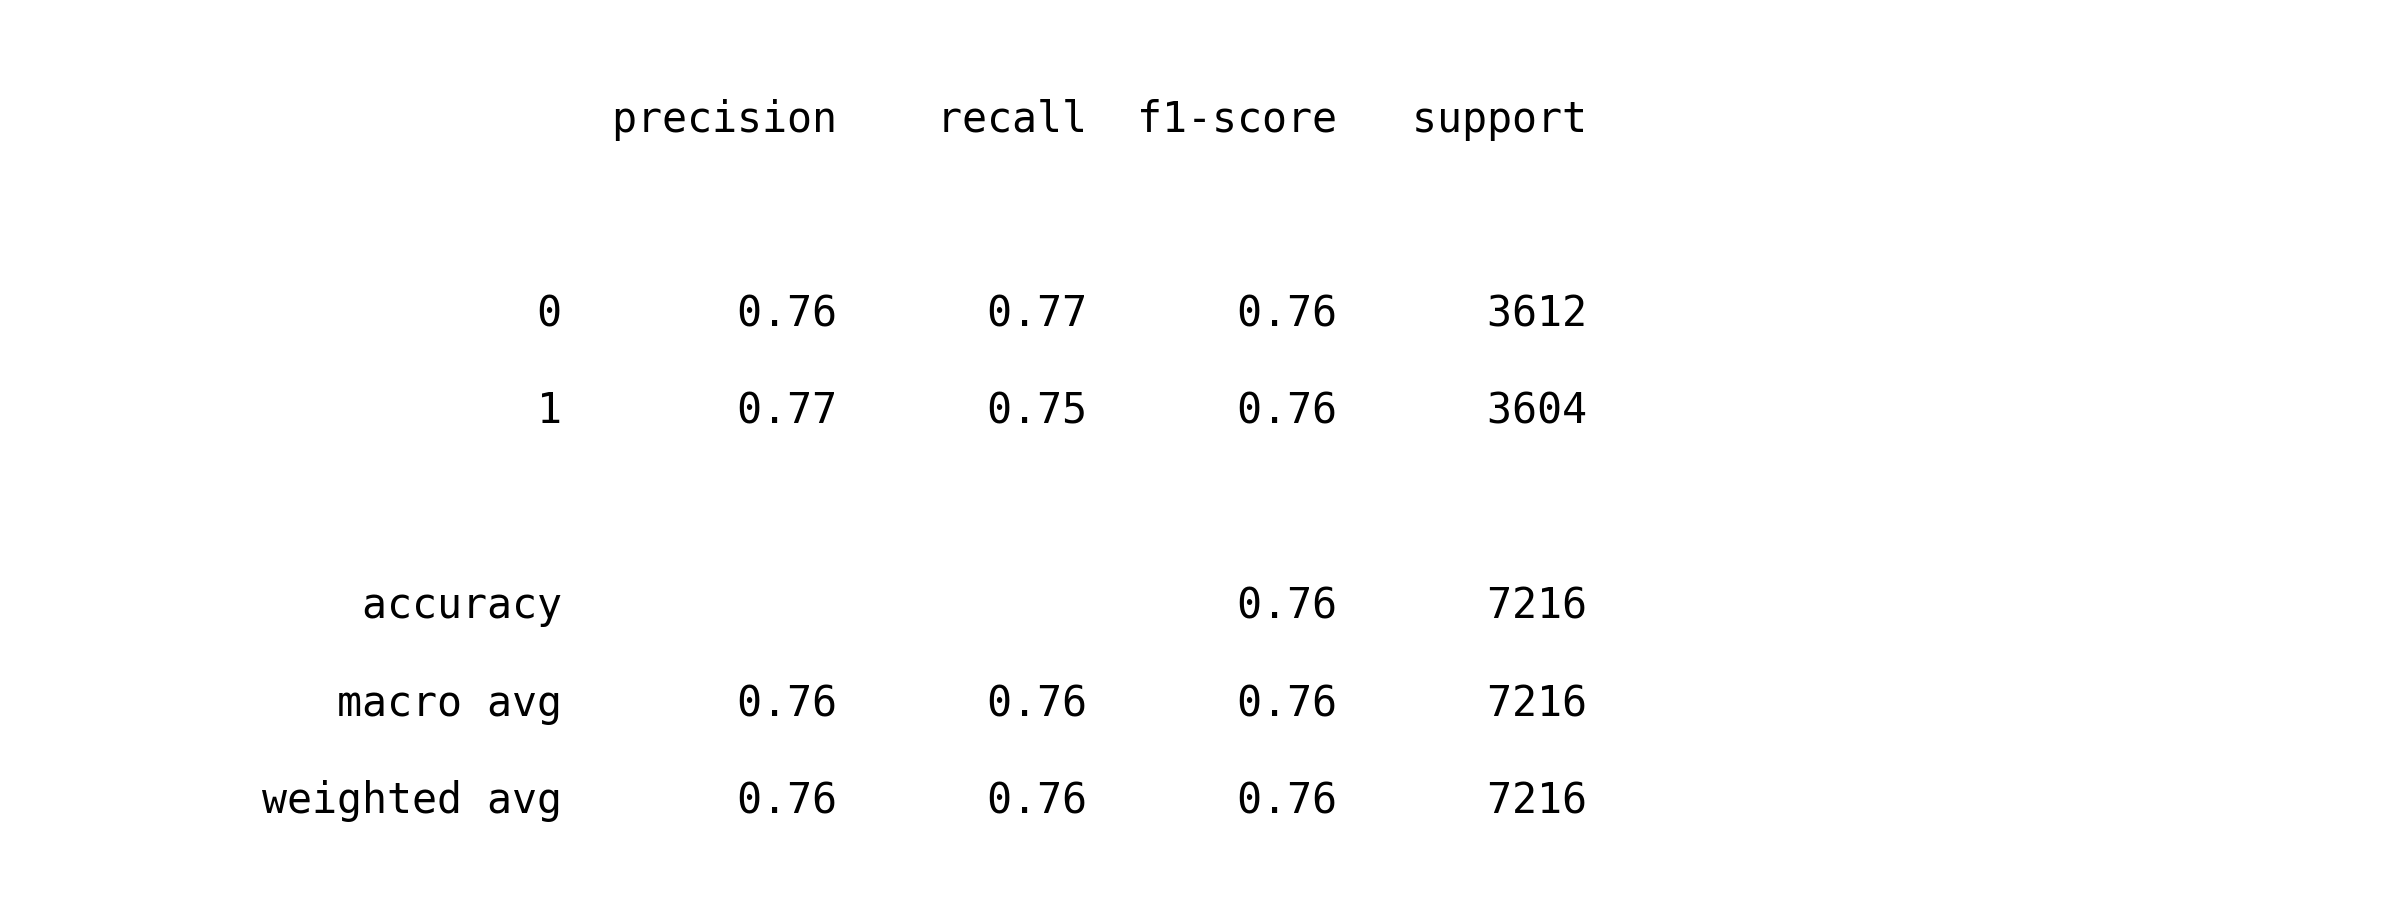

In [ ]:
balanced_data_report = classification_report(y_balanced_test, y_balanced_pred)
classfication_report_to_image(balanced_data_report, "balanced_data_classification_report")
# Open and display the image
Image("balanced_data_classification_report.png")

## Conclusions

### DataSet

The dataset had 180,000 rows with no nulls. It had the target column specified but all other predictor columns anonymized. All predictors were normally distributed and there was no correlation between any predictors. However, the dataset was heavily skewed towards target = 0 (non-successful transactions).

### Model performance

- Using Naive Bayes the model trained using the given dataset had an accuracy score of 91%
- However, upon closer inspection it was found that the false positives were high.
- Checking Precision and F1 scores confirmed that the model did not predict successful transaction with high fidelity.
- A second model was trained using balanced data.
- The accuracy score of the second model was 76%
- However, this time with the second model the false-positive dropped and were lower than the first model.
- Furthermore, the precision and F1 scores of the second model were higher.

### Lessons Learned

- Having a balanced dataset or creating a balanced dataset when possible will give a better result when attempting a binary classfication supervised learning model.

